# Project 2 :Social network analysis with Twitter 

# Introduction :

Social network analysis (SNA) is a way of graphing the relationships that exist on social networks. It provides a way of 

visualizing and analyzing how people are connected, how they interact, and who the important influencers are in a network.

# What is Natural Language Processing ?

Natural Language Processing (NLP) is a hotbed of research in data science these days and one of the most common applications of 

NLP is sentiment analysis.
In this project we're going to use TextBlob.


# Basic  libraries Used
For my Python script, I used the following Libraries:

1-Tweepy

2-TextBlob

3-Networkx

# Project Topic 
It all used to be so simple ,hosting something involved  stem ,strangers from the other side of the world didn't comment in your videos ,but now rules are changed. 
The explosion of social media means that now everyone talks to everyone about everything all the time ,and these conversations 
can be accessed again and  again forever. Constantly changing  the way we interact with each other. 
For instance in just one day 300 thousand new people joined Twitter 55 million tweets are written.

*It is therefore important to analyze the data flowing from Twitter with the tools provided by the theory
graphs to quantify feelings (sentiment analysis of Twitter).



# Part 1 :
# Twitter sentiment analysis with Python :
    

The first step in the process is tweeting on Twitter using the Search API.

In [1]:
from tweepy import API 

from tweepy import Cursor # cursor : to extract timeline tweets on your own timeline or friends timeline

from tweepy.streaming import StreamListener # this a class from the tweepy modalthat allows to listen to the tweets  

from tweepy import OAuthHandler # authentification

from tweepy import Stream

from textblob import TextBlob

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import re

# # # # TWITTER CLIENT # # # #

class TwitterClient(): 

    def __init__(self, twitter_user=None): # default argument if nothing is specified for twitter user it just defaults to none 

        self.auth = TwitterAuthenticator().authenticate_twitter_app() #to authenticate to communicate with the Twitter API
        
        self.twitter_client = API(self.auth)



        self.twitter_user = twitter_user 



    def get_twitter_client_api(self): # 

        return self.twitter_client



    def get_user_timeline_tweets(self, num_tweets): #num_tweets to determine how many tweets we want to extract

        tweets = []

        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
# cursor : class which allows us to get the user timeline tweets 
            tweets.append(tweet)

        return tweets



    def get_friend_list(self, num_friends):

        friend_list = []

        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):

            friend_list.append(friend)

        return friend_list



    def get_home_timeline_tweets(self, num_tweets):

        home_timeline_tweets = []

        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):

            home_timeline_tweets.append(tweet)

        return home_timeline_tweets










In [2]:
# # # # TWITTER AUTHENTICATER # # # #
ACCESS_TOKEN = "1048657425082077184-3UOaPXhoKEWzI27u9IWXVgmG5Uxf7l"

ACCESS_TOKEN_SECRET = "LKl58wLGhXrTJwnvBi13QY9hmFLgHemQnZqwncL2yJRRT"

CONSUMER_KEY = "NbnZAdD0p5ku4qqJvsZYrCRny"

CONSUMER_SECRET = "6fLG8Pi9sNCT9JzXhlBmbjfqbIBKYXRKBNx54jVBuEzMAcsyso"

class TwitterAuthenticator():

     

    def authenticate_twitter_app(self): # class methode so it takes self as a parameter
        # authenticate the twiiter application 
        auth = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET )
     
        auth.set_access_token(ACCESS_TOKEN , ACCESS_TOKEN_SECRET)
        # methode de  OAuth handler class 
        return auth



# # # # TWITTER STREAMER # # # #

class TwitterStreamer():

    """

    Class for streaming and processing live tweets.

    """

    def __init__(self):

        self.twitter_autenticator = TwitterAuthenticator()    



    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        #fetched_tweets_filename : si on veut enregistrer les tweets dans un fichier json or text instead ofshowing them on the terminal 
        # This handles Twitter authetification and the connection to Twitter Streaming API
        #hash_tag_list : the list  of keywords or hashtags that we wish to filter the tweets out by 
        listener = TwitterListener(fetched_tweets_filename)

        auth = self.twitter_autenticator.authenticate_twitter_app() 

        stream = Stream(auth, listener) # the listener object is responsible for 
        #auth : to vérifier si l'authentification àété bien passé ou nn


        # This line filter Twitter Streams to capture data by the keywords: 
        #filter : c'est une méthode de la class stream
       # on va prendre seulement les tweets selon les keywords/hashtags
        
        # track : est une liste qui vacontenir les tweets 
        stream.filter(track=hash_tag_list)




In [4]:
# # # # TWITTER STREAM LISTENER # # # #

class TwitterListener(StreamListener):

    """

    This is a basic listener that just prints received tweets to stdout.
    
    this class is going to inherit from streamlistener
    to print out the tweets / write it  to a file  standard listener

    """

    def __init__(self, fetched_tweets_filename):
      # 
        self.fetched_tweets_filename = fetched_tweets_filename



    def on_data(self, data): # de la class StreamListener
       # it take the date that is streamed in from streamListener , so the one that is listening for tweets and then it's going to print 
        try:

            print(data)
            
         
            
            with open(self.fetched_tweets_filename, 'a') as tf:
             # 'a' : append 
                tf.write(data)

            return True

        except BaseException as e:

            print("Error on_data %s" % str(e))
            # the error message : % str(e)
        return True

          

    def on_error(self, status): # de la class StreamListener
#
        if status == 420: # the status message of the error 
            # il faut vérifier que le status n'est pas de la form 420
            # * Returning False on_data method in case rate limit occurs.
            #error code message : 4to 0
            #Twitter api IMPOSES THESE THINGS called rates of limits 
            # 420 :the error code 
            return False # we gonna kill the connection 

        print(status)





class TweetAnalyzer():

    """

    Functionality for analyzing and categorizing content from tweets.

    """



    def clean_tweet(self, tweet):

        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())



    def analyze_sentiment(self, tweet):

        analysis = TextBlob(self.clean_tweet(tweet))

        

        if analysis.sentiment.polarity > 0:

            return 1

        elif analysis.sentiment.polarity == 0:

            return 0

        else:

            return -1



    def tweets_to_data_frame(self, tweets):

        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])



        df['id'] = np.array([tweet.id for tweet in tweets])

        df['len'] = np.array([len(tweet.text) for tweet in tweets])

        df['date'] = np.array([tweet.created_at for tweet in tweets])

        df['source'] = np.array([tweet.source for tweet in tweets])

        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])

        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        return df



 

if __name__ == '__main__':



    twitter_client = TwitterClient()

    tweet_analyzer = TweetAnalyzer()



    api = twitter_client.get_twitter_client_api()



    tweets = api.user_timeline(screen_name="PyTennessee", count=1000)

    df = tweet_analyzer.tweets_to_data_frame(tweets)

    df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])



    print(df.head(2000))

                                                tweets                   id  \
0    Our huge thanks to @revsys for their sponsorsh...  1068580424908238850   
1    #pytn19 is thrilled to provide mentorship for ...  1068225585028055040   
2    We're working through our cfp submissions and ...  1067863197473009664   
3    #pytn19's Holiday Gift Guide: \n- Early Bird: ...  1066021057771913216   
4    Happy Thanksgiving! What's your favorite pie??...  1065658669923278848   
5    Our huge thanks to @sixfeetup for their sponso...  1065296281478795264   
6    Our huge thanks to @HiMorty for their sponsors...  1064933896167378944   
7    Who? You\nWhen? February 9-10, 2019 \nWhere? N...  1064571506771021827   
8    We're still jazzed for @jessejiryudavis and @J...  1063484342746267648   
9    Early Bird tickets are still out! have you got...  1062793540777005058   
10   What's got 89 days left and theoretically two ...  1062032530100998144   
11   In 2019, we aspire to have a pair programming .

In [5]:
# Time Series for the number of Likes :

125.305
41
46


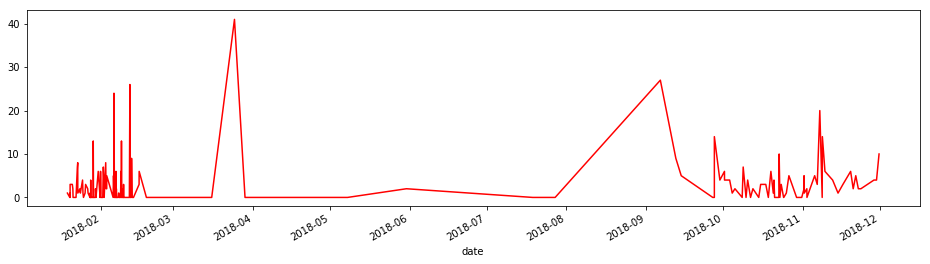

In [6]:

#get average length over all tweets:
print(np.mean(df['len']))
#get the number of likes for the most liked tweet:
print(np.max(df['likes']))
#get the number of retweets for the most retweeted tweet :
print(np.max(df['retweets']))
#Time Series 
time_likes=pd.Series(data=df['likes'].values,index=df['date'])
time_likes.plot(figsize=(16,4),color='r')
plt.show()


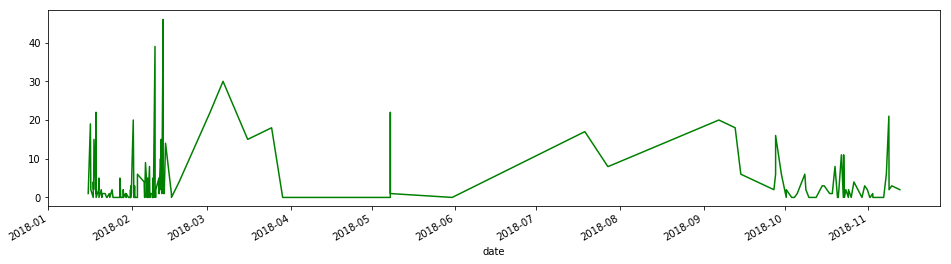

In [6]:
# The time Series for retweets :
time_retweets=pd.Series(data=df['retweets'].values,index=df['date'])
time_retweets.plot(figsize=(16,4),color='g')
plt.show()

-> we can see a kind of a similar type of graph and this spike also corresponds to the 
same spike probably where that huge tweet which was like a lot was also retweeted 
the number of retweets is in some way correlated to the number of likes


# To verify if the retweets and the number of likes are correlated we can bunch the time series together into one plot :

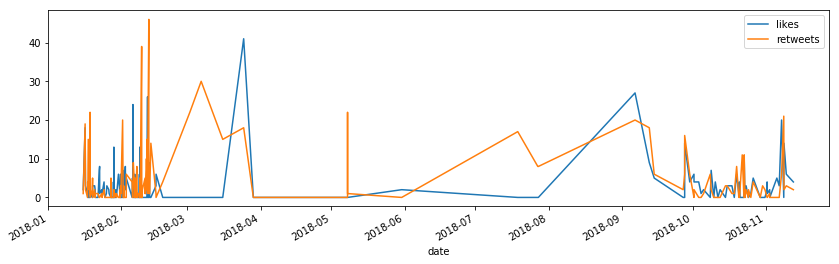

In [7]:
time_likes=pd.Series(data=df['likes'].values,index=df['date'])
time_likes.plot(figsize=(14,4),label='likes',legend=True)
time_retweets=pd.Series(data=df['retweets'].values,index=df['date'])
time_retweets.plot(figsize=(14,4),label='retweets',legend=True)
plt.show()

---> There is for sure a correlation between the likes and the number of retweets.

In [8]:
df.to_csv("C:/Users/azerty/Desktop/4DS/PY.csv",sep=';')

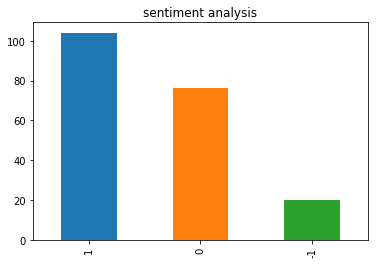

In [11]:
df.sentiment.value_counts().plot(kind='bar',title="sentiment analysis");

# Python NLTK sentiment analysis


The purpose of this part is to separate the Positive and Negative tweets of the training set in order to easily visualize their contained words.Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

In [5]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output

In [7]:
import pandas as pd
data=pd.read_csv("C:/Users/azerty/Desktop/4DS/PY.csv",sep=";")
data

,tweets,id,len,date,source,likes,retweets,sentiment
0,@jonafato Is a lobster roll a sandwich though?,"1,05841E+18",46,02/11/2018 17:25,Twitter Web Client,0,0,0
1,Now that we did all that hard work on proposal...,"1,0584E+18",140,02/11/2018 16:30,TweetDeck,1,0,-1
2,Thank you so much to everyone who submitted to...,"1,05803E+18",131,01/11/2018 16:30,TweetDeck,0,0,1
3,🙌🏼 A HUGE thank you to everyone who submitted ...,"1,058E+18",140,01/11/2018 14:22,Twitter Web Client,4,0,1
4,@Transition @jonafato @PyCaribbean @pythondaym...,"1,058E+18",140,01/11/2018 14:13,Twitter Web Client,2,0,1
5,Final countdown! Today is the last day of our ...,"1,05767E+18",133,31/10/2018 16:30,TweetDeck,0,2,0
6,Dos. Deux. Two. That's how many days we have l...,"1,05731E+18",122,30/10/2018 16:30,TweetDeck,0,3,1
7,It's the final countdown to #pytn19's CFP dead...,"1,05695E+18",126,29/10/2018 16:30,TweetDeck,0,0,0
8,Got a @PyGotham talk that you'd love to bring ...,"1,05586E+18",129,26/10/2018 16:45,TweetDeck,6,4,1
9,Need to know more about how our speakership op...,"1,0555E+18",140,25/10/2018 16:45,TweetDeck,1,0,1


In [8]:
import numpy as np
data =data.iloc[:, [0, 7]]

In [9]:
data

,tweets,sentiment
0,@jonafato Is a lobster roll a sandwich though?,0
1,Now that we did all that hard work on proposal...,-1
2,Thank you so much to everyone who submitted to...,1
3,🙌🏼 A HUGE thank you to everyone who submitted ...,1
4,@Transition @jonafato @PyCaribbean @pythondaym...,1
5,Final countdown! Today is the last day of our ...,0
6,Dos. Deux. Two. That's how many days we have l...,1
7,It's the final countdown to #pytn19's CFP dead...,0
8,Got a @PyGotham talk that you'd love to bring ...,1
9,Need to know more about how our speakership op...,1


In [20]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
#train
train = train[train.sentiment != 0]

Positive words


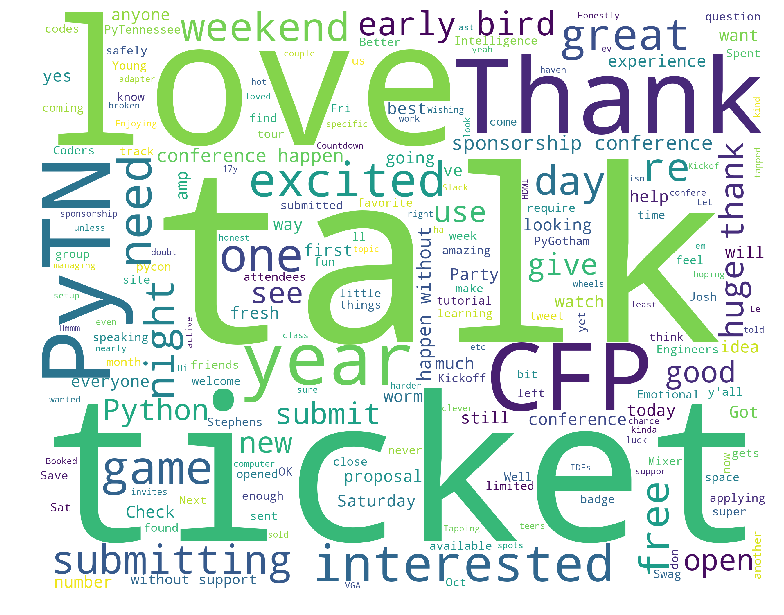

Negative words


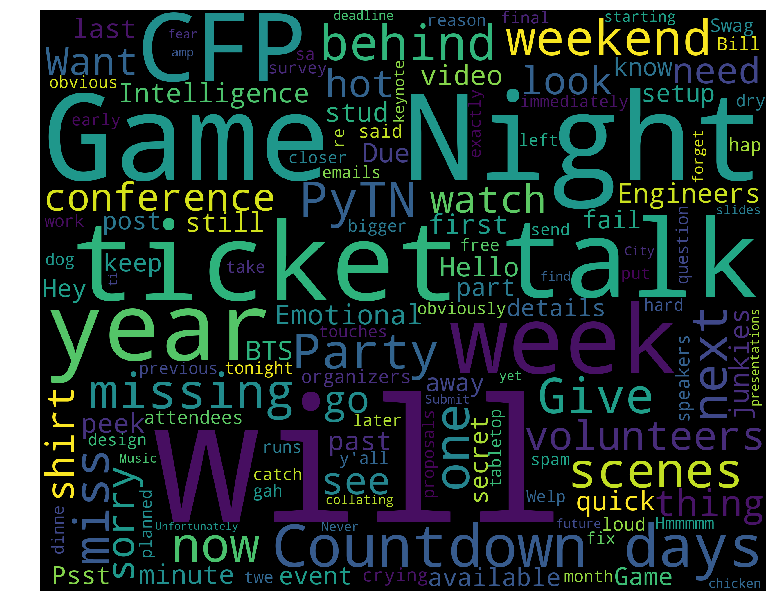

In [14]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

train_pos = train[ train['sentiment'] == 1]
train_pos = train_pos['tweets']
train_neg = train[ train['sentiment'] == -1]
train_neg = train_neg['tweets']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [10]:
df =data

In [14]:
import plotly
from plotly import graph_objs
neg = len(df[df["sentiment"] == -1])
pos = len(df[df["sentiment"] == 1])
neu = len(df[df["sentiment"] == 0])
dist = [ graph_objs.Bar(x=[-1,0,1],y=[neg, neu, pos],)]


In [15]:
plotly.offline.iplot({"data":dist, "layout":graph_objs.Layout(title="Sentiment type distribution in training set")})

# Dynamically Graphing Terms for Sentiment 

In [ ]:
why not also have a live graph that shows the sentiment trend? 

In [ ]:
import dash
from dash.dependencies import Output, Event
import dash_core_components as dcc
import dash_html_components as html
import plotly
import random
import plotly.graph_objs as go
from collections import deque 

In [ ]:
X = deque(maxlen=20)
X.append(1)
Y = deque(maxlen=20)
Y.append(1)


app = dash.Dash(__name__)
app.layout = html.Div(
    [
        dcc.Graph(id='live-graph', animate=True),
        dcc.Interval(
            id='graph-update',
            interval=1*1000
        ),
    ]
)

@app.callback(Output('live-graph', 'figure'),
              events=[Event('graph-update', 'interval')])
def update_graph_scatter():
    global X
    global Y
    X.append(X[-1]+1)
    Y.append(Y[-1]+Y[-1]*random.uniform(-0.1,0.1))

    data = plotly.graph_objs.Scatter(
            x=list(X),
            y=list(Y),
            name='Scatter',
            mode= 'lines+markers'
            )

    return {'data': [data],'layout' : go.Layout(xaxis=dict(range=[min(X),max(X)]),
                                                yaxis=dict(range=[min(Y),max(Y)]),)}



if __name__ == '__main__':
    app.run_server(debug=True)

# partie 2:
# Make networks with Twitter data
*We're going to look at the Twitter handles that PyTennessee follows, as well as the relationships between those handles.
*What is PyTennessee :
PyTennessee is a yearly regional Python conference held every February in Nashville.
We're going to analyse people followed by paytennessee 



In [4]:
import json
f = open('C:/Users/azerty/Desktop/4DS/list.PyTennessee.json') #ouverture de la fichier "PyTennessee.json"

data = json.load(f) #Pour stocker les données du fichier JSON dans un dictionnaire python (data est un dictionnaire)
pairs = [] # une liste de tuple.

for user in data['users']: # ['users'] est une list de dictionnaire
    pairs.append(('PyTennessee', str(user['screen_name'])))

pairs[:100]

[('PyTennessee', 'LampPostGroup'),
 ('PyTennessee', 'octovisinc'),
 ('PyTennessee', 'nashdevcal'),
 ('PyTennessee', 'hsvpy'),
 ('PyTennessee', 'bvalentine615'),
 ('PyTennessee', 'awebneck'),
 ('PyTennessee', 'ascot21'),
 ('PyTennessee', 'pyohio'),
 ('PyTennessee', 'CalEvans'),
 ('PyTennessee', 'nodevember'),
 ('PyTennessee', 'pythonanywhere'),
 ('PyTennessee', 'whitacre'),
 ('PyTennessee', 'adafruit'),
 ('PyTennessee', 'MosaikGlobal'),
 ('PyTennessee', 'nostarch'),
 ('PyTennessee', 'Spotify'),
 ('PyTennessee', 'newrelic'),
 ('PyTennessee', 'JuiceAnalytics'),
 ('PyTennessee', 'SimonSolutions'),
 ('PyTennessee', 'waypaverlabs'),
 ('PyTennessee', 'tsclausing'),
 ('PyTennessee', 'LipscombCCT'),
 ('PyTennessee', 'NashGeekJam'),
 ('PyTennessee', 'elegant_stitch'),
 ('PyTennessee', 'GitHubCommunity'),
 ('PyTennessee', 'juliaelman'),
 ('PyTennessee', 'timoguin'),
 ('PyTennessee', 'InformIT'),
 ('PyTennessee', 'heroku'),
 ('PyTennessee', 'jilljubs'),
 ('PyTennessee', 'thefeatures'),
 ('PyTennes

In [5]:
data # un dictionnaire

{'previous_cursor': 0,
 'previous_cursor_str': '0',
 'next_cursor': 0,
 'users': [{'follow_request_sent': False,
   'profile_use_background_image': True,
   'profile_text_color': '333333',
   'default_profile_image': False,
   'id': 296227599,
   'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
   'verified': False,
   'profile_location': None,
   'muting': False,
   'profile_image_url_https': 'https://pbs.twimg.com/profile_images/559794944446300161/fTseZjyJ_normal.jpeg',
   'profile_sidebar_fill_color': 'DDEEF6',
   'entities': {'url': {'urls': [{'url': 'http://t.co/PRndbFLtxi',
       'indices': [0, 22],
       'expanded_url': 'http://lamppostgroup.com',
       'display_url': 'lamppostgroup.com'}]},
    'description': {'urls': []}},
   'followers_count': 3127,
   'profile_sidebar_border_color': 'C0DEED',
   'id_str': '296227599',
   'profile_background_color': 'C0DEED',
   'listed_count': 79,
   'status': {'contributors': None,
    'truncated

In [11]:
# Comme les données de relation sont réparties sur plusieurs fichiers, nous devons parcourir tous pour obtenir les données.
#dir_names :Renvoie le nom du répertoire chemin.
#os : Ce module fournit un moyen portable d’utiliser les fonctionnalités dépendantes du système d’exploitation.
#split () : une méthode qui retourne une liste de chaînes après avoir cassé la chaîne donnée par le séparateur spécifié.


import os

for (dir_path, dir_names, file_names) in os.walk('C:/Users/azerty/Desktop/4DS/friend_relationships/'):
    files = file_names
    
for file_name in files:
    with open('C:/Users/azerty/Desktop/4DS/friend_relationships/' + file_name) as p:
        pair_data = json.load(p) #pair_data : est un dictionnaire , la clé contient les deux users name
       
        for k in pair_data.keys(): # on va boucler sur la clé 
            twitter_pair = k.split()
            # on va tester sur following et followed by si sont true -> on ajoute dans la liste 
            if pair_data[k]['relationship']['source']['following'] is True:
                pairs.append((str(twitter_pair[0]), str(twitter_pair[1])))
            elif pair_data[k]['relationship']['source']['followed_by'] is True:
                pairs.append((str(twitter_pair[1]), str(twitter_pair[0])))
                
len(pairs)
pairs[-100:]
            

[('kcunning', 'ForecastWatch'),
 ('vongrippen', 'jasonamyers'),
 ('vongrippen', 'MemphisPython'),
 ('roguelynn', 'CaktusGroup'),
 ('kcunning', 'CaktusGroup'),
 ('roguelynn', 'ThePSF'),
 ('robertlay', 'ThePSF'),
 ('ContinuumIO', 'alex_gaynor'),
 ('jacqueswoodcock', 'jasonamyers'),
 ('jorendorff', 'egdelwonk'),
 ('roguelynn', 'pycon'),
 ('PyNashLadies', 'pynash'),
 ('YiawayYeh', 'hacknashville'),
 ('cobenian', 'enthought'),
 ('robertlay', 'pycoders'),
 ('dreasoning', 'jessicamckellar'),
 ('jacqueswoodcock', 'egdelwonk'),
 ('roguelynn', 'gvanrossum'),
 ('jessicamckellar', 'jorendorff'),
 ('cobenian', 'ThePSF'),
 ('JoshMock', 'byeliad'),
 ('roguelynn', 'alex_gaynor'),
 ('cobenian', 'pycon'),
 ('kcunning', 'CallbackWomen'),
 ('egdelwonk', 'jessicamckellar'),
 ('kcunning', 'geography76'),
 ('alex_gaynor', 'mitsuhiko'),
 ('cobenian', 'pycoders'),
 ('ForecastWatch', 'jessicamckellar'),
 ('R_Macy', 'YiawayYeh'),
 ('rubybuddha', 'jasonamyers'),
 ('jorendorff', 'raymondh'),
 ('jorendorff', 'jason

# Make networks with Twitter data



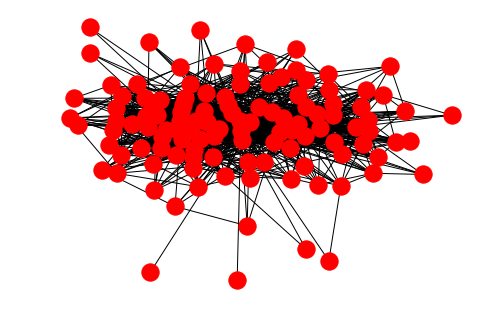

In [17]:
%matplotlib inline
import networkx as nx

# Build an undirected graph.
g=nx.Graph() # create a graph
g.add_edges_from(pairs) # add multiple nodes
nx.draw(g)

-> Just from looking at it,  this network is connected 

In [18]:
# find the highest and lowest values, use this function 
# on the output of the centrality measures like degree_centrality():
#Le module "operator contient des fonctions permettant d'effectuer des comparaisons d'objets, des opérations logiques, des opérations mathématiques et des opérations de séquence.
import operator

def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(), key=operator.itemgetter(1))
#le retour de cette fonction est une liste de tuples triée par le deuxième élément de chaque tuple
# sorted :fonction intégrée qui crée une nouvelle liste triée à partir d'un itérable.
#items () : une méthode qui retourne une liste de paires de tuples dict (clé, valeur)
#TUPLE=(user,centrality_degree)

# What is "degree centrality" ?
degree=measure of node importance

degree centrality :number of nodes connected to node

In [21]:
# Which nodes have the highest/lowest degree centrality?
degree_cent=nx.degree_centrality(g)
#print(degree_cent) # degree_cent est un dictionnaire 
degree_sorted = centrality_sort(degree_cent) #degree_sorted :liste de tuple
degree_sorted [-10:] # with the highest degree centrality (top 10)

[('timoguin', 0.3793103448275862),
 ('jessenoller', 0.3793103448275862),
 ('roguelynn', 0.3879310344827586),
 ('byeliad', 0.3879310344827586),
 ('gvanrossum', 0.39655172413793105),
 ('jacqueswoodcock', 0.4051724137931034),
 ('pyohio', 0.41379310344827586),
 ('jasonamyers', 0.603448275862069),
 ('egdelwonk', 0.7672413793103449),
 ('PyTennessee', 1.0)]

-> PyTennessee has the most important degree_centrality (=1.0)

# what is betweenness centrality ?

In graph theory, betweenness centrality is a measure of centrality in a graph based on shortest paths, it represents the degree of which nodes stand between each other.

In [24]:
# Which nodes have the highest/lowest betweenness centrality?
betweenness_cent=nx.betweenness_centrality(g)
bet_sorted=centrality_sort(betweenness_cent)
bet_sorted[-10:]

[('ForecastWatch', 0.00985558119430265),
 ('gvanrossum', 0.011504173958800693),
 ('roguelynn', 0.013783087985679416),
 ('byeliad', 0.014951131911705806),
 ('jacqueswoodcock', 0.015618198129903194),
 ('pyohio', 0.016718743040420387),
 ('timoguin', 0.017094265351580585),
 ('jasonamyers', 0.04648643703702744),
 ('egdelwonk', 0.11449112331343882),
 ('PyTennessee', 0.3205032947308686)]

-> PyTennessee has the highest betweennes centrality.

-> ForecastWatch has the lowest betweennes centrality.

# What is closeness centrality ?

Closeness centrality is the average length of shortest paths.

In [25]:
# Which nodes have the highest/lowest closeness centrality?
closeness_cent=ness_cent=nx.closeness_centrality(g)
closeness_sorted=centrality_sort(closeness_cent) # on va trier les "centrality_sort"
closeness_sorted[-10:]

[('timoguin', 0.6170212765957447),
 ('jessenoller', 0.6170212765957447),
 ('roguelynn', 0.6203208556149733),
 ('byeliad', 0.6203208556149733),
 ('gvanrossum', 0.6236559139784946),
 ('jacqueswoodcock', 0.6270270270270271),
 ('pyohio', 0.6304347826086957),
 ('jasonamyers', 0.7160493827160493),
 ('egdelwonk', 0.8111888111888111),
 ('PyTennessee', 1.0)]

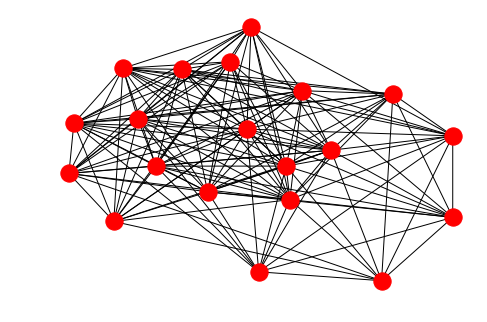

In [48]:
# Let's look at subsections of the graph.
#the top 20 highest degree
#subgraph :crée un sous-graphe d'un graphe contenant uniquement les sommets spécifiés et toutes leurs arêtes
# ici on va faire un slicing selon le top 20 de degree_sorted : une liste de tupe (,degree_centrality)
highest_degree=[node[0] for node in degree_sorted[-20:]]
sub=g.subgraph(highest_degree)
nx.draw(sub)



In [50]:
nx.shortest_path_length(sub,'PyTennessee','pyohio')

1

In [51]:
# degree distrubution : number of connection of each node.
sub.degree()


DegreeView({'ForecastWatch': 14, 'timoguin': 11, 'jasonamyers': 19, 'gvanrossum': 14, 'R_Macy': 9, 'diana_clarke': 16, 'pycon': 16, 'coop_geo': 13, 'byeliad': 12, 'jacqueswoodcock': 11, 'egdelwonk': 17, 'pyohio': 14, 'catherinedevlin': 17, 'kcunning': 18, 'roguelynn': 16, 'PyTennessee': 19, 'ThePSF': 17, 'kevinharvey': 13, 'alex_gaynor': 16, 'jessenoller': 16})

-> 
PyTennessee is connected to each node of this graph it has the maximum number of connection.

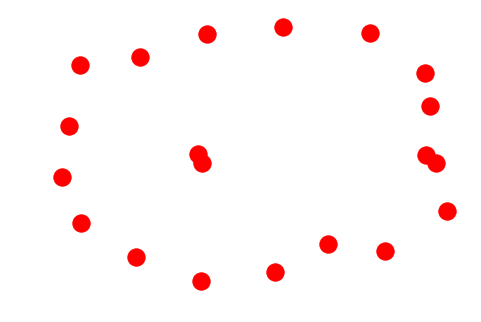

In [53]:
# lowest degree
lowest_degree=[node[0] for node in degree_sorted[:20]]
sub1=g.subgraph(lowest_degree)
nx.draw(sub1)

--> This Network  is made by the lowest degrees , they are not connected to each other because they have very low degree.


In [54]:
# degree distribution :
sub1.degree()

DegreeView({'pyrsonwho': 0, 'InformIT': 0, 'NashGeekJam': 0, 'pragprog': 0, 'rubybuddha': 1, 'LampPostGroup': 0, 'GitHubCommunity': 1, 'whitacre': 0, 'MosaikGlobal': 0, 'toranb': 0, 'studionow': 0, 'jetbrains': 1, 'thefeatures': 0, 'adamfblahblah': 0, 'Spotify': 0, 'JuiceAnalytics': 0, 'pycharm': 1, 'mozilla': 0, 'adafruit': 0, 'SurveyMonkey': 0})

--> only a couple of these nodes connected with in this Network.

In [57]:
nx.average_shortest_path_length(sub1) 
#Pour calculer les plus courts chemins dans le graphique.



NetworkXError: Graph is not connected.

Oops !!
We can't calculate the average with a graph  unconnected.

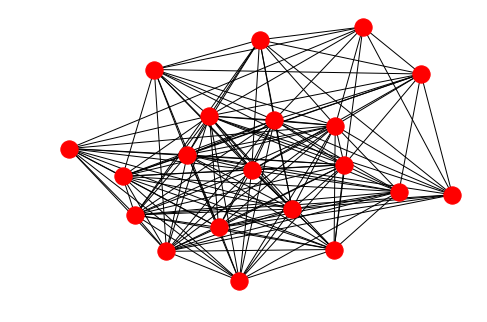

In [68]:
#highest betweennes :

highest_bet=[node[0] for node in degree_sorted[-20:]]
sub2=g.subgraph(highest_bet)
nx.draw(sub2)

In [70]:
#average shartest path :
nx.average_shortest_path_length(sub2)

1.2157894736842105

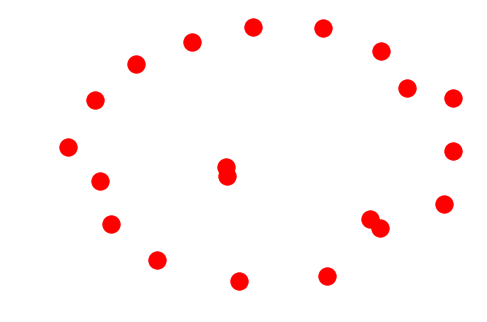

In [67]:
#lowest betweennes :

lowest_bet=[node[0] for node in degree_sorted[:20]]
sub3=g.subgraph(lowest_bet)
nx.draw(sub3)

take subsections of the highest and lowest centrality scoring 
find degree distribution and average shortest  path for each 
output each graph 

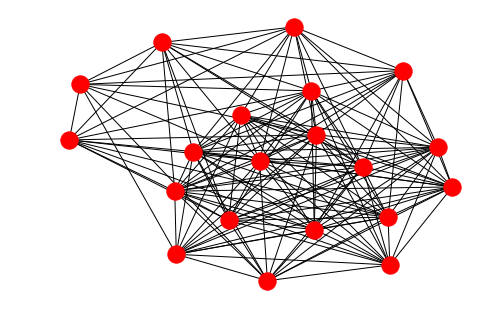

In [76]:
highest_close=[node[0] for node in closeness_sorted[-20:]]
sub4=g.subgraph(highest_close)
nx.draw(sub4)

In [77]:
sub4.degree()

DegreeView({'ForecastWatch': 14, 'timoguin': 11, 'jasonamyers': 19, 'gvanrossum': 14, 'R_Macy': 9, 'diana_clarke': 16, 'pycon': 16, 'coop_geo': 13, 'byeliad': 12, 'jacqueswoodcock': 11, 'egdelwonk': 17, 'pyohio': 14, 'catherinedevlin': 17, 'kcunning': 18, 'roguelynn': 16, 'PyTennessee': 19, 'ThePSF': 17, 'kevinharvey': 13, 'alex_gaynor': 16, 'jessenoller': 16})

In [78]:
nx.average_shortest_path_length(sub4)

1.2157894736842105

# Directed graph


Let's add some direction to the graph. When we processed our data, we ordered the pairs so that the first handle in the pair is a follower of the second handle. We're not worrying about pairs that mutually follow each other right now.



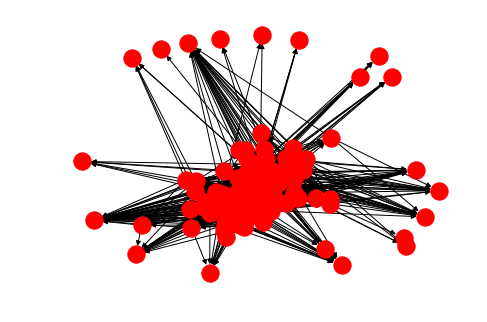

In [86]:
# Build a directed graph.
dg=nx.DiGraph(pairs)
nx.draw(dg)

# Visualizations

In [27]:
import networkx as nx

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

edgelist_txt = 'C:/Users/azerty/Desktop/4DS/retweets.txt'
G = nx.read_edgelist(edgelist_txt, create_using=nx.DiGraph())

['PyTennessee']


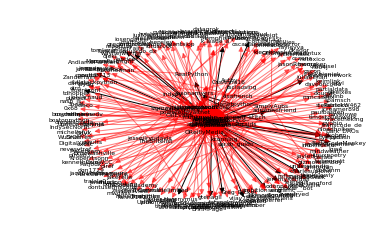

In [63]:
LAYOUTS = {
    'circular': nx.circular_layout,
    'fr': nx.fruchterman_reingold_layout,
    'random': nx.random_layout,
    'shell': nx.shell_layout,
    'spectral': nx.spectral_layout,
    'spring': nx.spring_layout
}

def save_layout(G, layout_name):
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1.5]
    nlarge=[n for n in G.nodes() if n in ['PyTennessee']]
    pos=LAYOUTS[layout_name](G) # positions for all nodes

    print (nlarge)
    # nodes
    nx.draw_networkx_nodes(G,pos,nodelist=nlarge,node_size=700)

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.5,edge_color='r',font_size=500)

    # labelsM
    labels={}
    labels['PyTennessee']='PyTennessee'
    #nx.draw_networkx_labels(G,pos,labels,font_size=10)
    nx.draw_networkx_labels(G,pos,nodelist=nlarge,font_size=6,font_family='sans-serif')

    plt.axis('off')
    plt.savefig(layout_name + '.png', dpi=2000)

save_layout(G, 'fr')